In [2]:
# Importation les librairies necessaires au TP : 
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn import cluster
from sklearn import metrics
import pandas
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans



In [3]:
# Lecture du fichier fromage1.txt
fromage = pd.read_table('fromage1.txt', sep='\t', header=0, index_col=0)
fromage.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


In [4]:
# Affichage des statistiques descriptives
fromage.describe()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,300.034483,210.086207,185.734483,24.158621,67.562069,13.010345,20.168966,74.586207,26.965517
std,91.914356,108.678923,72.528882,8.129642,24.163098,11.723339,6.959788,28.245755,11.318388
min,70.000000,22.000000,72.600000,3.400000,37.100000,1.200000,4.100000,10.000000,10.000000
25%,292.000000,140.000000,132.900000,23.400000,51.600000,4.900000,17.800000,70.000000,20.000000
50%,321.000000,223.000000,202.300000,26.300000,62.300000,6.400000,21.000000,80.000000,26.000000
75%,355.000000,276.000000,220.500000,29.100000,76.400000,21.100000,23.400000,90.000000,30.000000
max,406.000000,432.000000,334.600000,33.300000,150.500000,36.400000,35.700000,120.000000,51.000000


array([[<AxesSubplot: xlabel='calories', ylabel='calories'>,
        <AxesSubplot: xlabel='sodium', ylabel='calories'>,
        <AxesSubplot: xlabel='calcium', ylabel='calories'>,
        <AxesSubplot: xlabel='lipides', ylabel='calories'>,
        <AxesSubplot: xlabel='retinol', ylabel='calories'>,
        <AxesSubplot: xlabel='folates', ylabel='calories'>,
        <AxesSubplot: xlabel='proteines', ylabel='calories'>,
        <AxesSubplot: xlabel='cholesterol', ylabel='calories'>,
        <AxesSubplot: xlabel='magnesium', ylabel='calories'>],
       [<AxesSubplot: xlabel='calories', ylabel='sodium'>,
        <AxesSubplot: xlabel='sodium', ylabel='sodium'>,
        <AxesSubplot: xlabel='calcium', ylabel='sodium'>,
        <AxesSubplot: xlabel='lipides', ylabel='sodium'>,
        <AxesSubplot: xlabel='retinol', ylabel='sodium'>,
        <AxesSubplot: xlabel='folates', ylabel='sodium'>,
        <AxesSubplot: xlabel='proteines', ylabel='sodium'>,
        <AxesSubplot: xlabel='cholesterol',

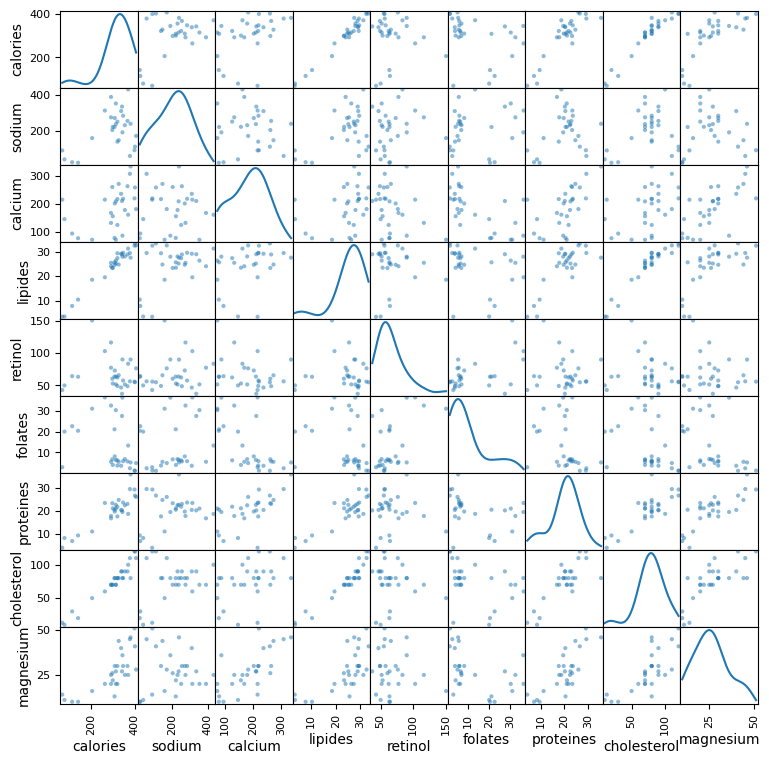

In [5]:
#croisement 2 à 2 des variables
scatter_matrix(fromage, figsize=(9,9), diagonal='kde')

In [6]:
# Essai de classification avec la méthode des centres mobiles :
np.random.seed(0)
kmeans = cluster.KMeans(n_clusters = 4)
kmeans.fit(fromage)
idk = np.argsort(kmeans.labels_)
print(pd.DataFrame(fromage.index[idk],kmeans.labels_[idk]))
print(kmeans.transform(fromage))

             Fromages
0         CarredelEst
0                Tome
0         PontlEveque
0           Chabichou
0            Chaource
0         Coulomniers
0  Fr.chevrepatemolle
1            Beaufort
1         SaintPaulin
1             Cheddar
1               Comte
1                Edam
1            Emmental
1            Vacherin
1            Parmesan
2       Petitsuisse40
2  Yaourtlaitent.nat.
2      Fr.frais20nat.
2      Fr.frais40nat.
3           Maroilles
3             Morbier
3              Cantal
3           Camembert
3            Pyrenees
3           Reblochon
3          Rocquefort
3                Bleu
3             Babybel
3         Fr.fondu.45
[[123.59715669 285.36163076 384.27301005 145.46927992]
 [110.54651897 118.43379084 303.10311983  71.72681089]
 [235.25665316  56.72603293 349.91323389 218.1879268 ]
 [159.09984736 200.30401971 393.76898843  45.60922494]
 [141.19170858 210.31138298 332.43471728  84.66051854]
 [180.75982487 111.73150994 371.97076666  86.99931839]
 [ 72.0404

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0.34539475 0.37299771 0.3369907  0.26984946 0.30798175 0.23044518
 0.26802594 0.23915767 0.24009754]


<function matplotlib.pyplot.show(close=None, block=None)>

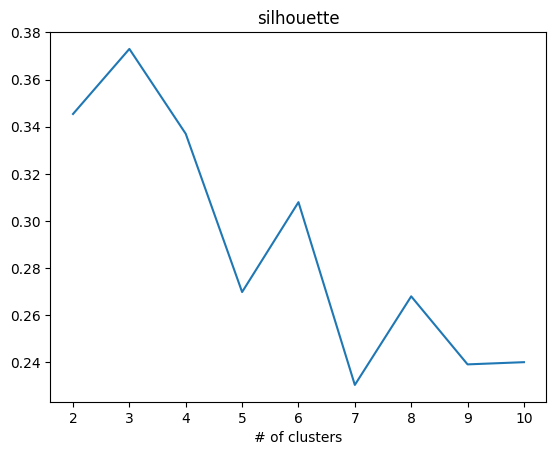

In [7]:
#utilisation de la métrique "silhouette"
res = np.arange(9, dtype ="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters = k+2, n_init="auto")
    km.fit(fromage)
    res[k] = metrics.silhouette_score(fromage,km.labels_)
print (res)
plt.title("silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),(res))
plt.show

[407212.36316667 249665.8615     211640.63685714 148220.35388889
 129740.23708333 118649.8195      94905.37738095 100059.76321429
  79307.45483333]


<function matplotlib.pyplot.show(close=None, block=None)>

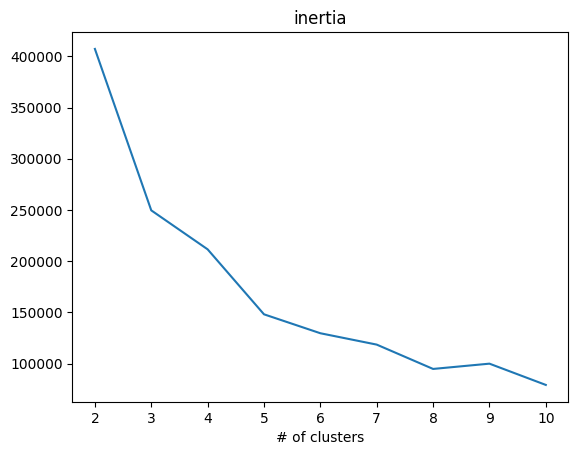

In [8]:
#utilisation de la métrique inertia
res = np.arange(9, dtype ="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters = k+2, n_init="auto")
    km.fit(fromage)
    res[k] = km.inertia_
print (res)
plt.title("inertia")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),(res))
plt.show


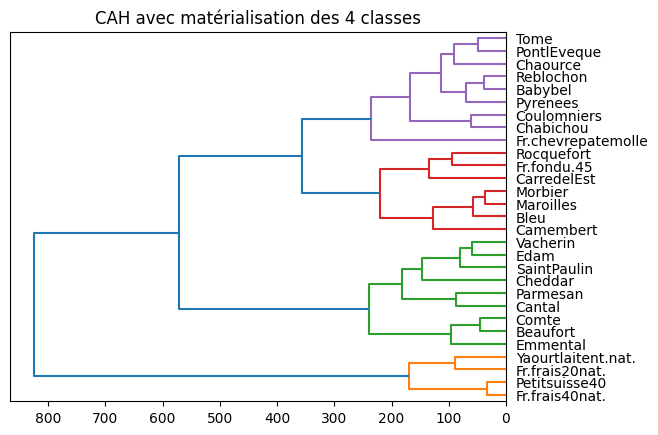

[3 4 2 3 3 2 4 4 2 2 4 2 2 4 3 1 1 3 3 2 1 4 4 4 3 2 4 2 1]
             Fromages
1  Yaourtlaitent.nat.
1       Petitsuisse40
1      Fr.frais40nat.
1      Fr.frais20nat.
2         SaintPaulin
2            Beaufort
2              Cantal
2            Parmesan
2             Cheddar
2               Comte
2                Edam
2            Emmental
2            Vacherin
3          Rocquefort
3             Morbier
3           Maroilles
3         CarredelEst
3           Camembert
3                Bleu
3         Fr.fondu.45
4         Coulomniers
4            Chaource
4           Chabichou
4         PontlEveque
4            Pyrenees
4           Reblochon
4             Babybel
4                Tome
4  Fr.chevrepatemolle


In [9]:
# Essai de classification avec la méthode CAH :
Z = linkage(fromage,method='ward', metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=fromage.index,orientation='left',color_threshold=255)
plt.show()
groupes_cah = fcluster(Z, t = 255,criterion='distance')
print(groupes_cah)
#index triés des groupes
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
print(pandas.DataFrame(fromage.index[idg],groupes_cah[idg]))

In [10]:
print(pd.crosstab(kmeans.labels_,groupes_cah))

col_0  1  2  3  4
row_0            
0      0  0  1  6
1      0  8  0  0
2      4  0  0  0
3      0  1  6  3


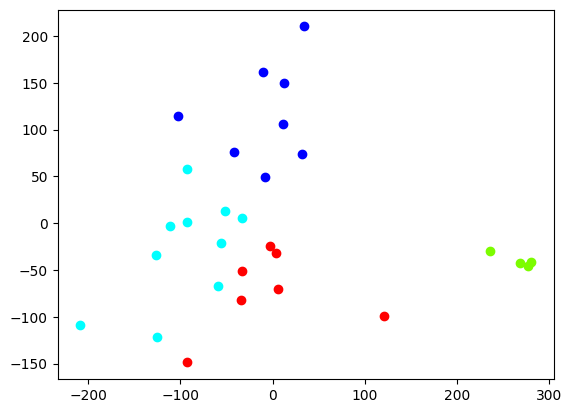

In [11]:
acp = PCA(n_components =2).fit_transform(fromage)
for couleur,k in zip(['red','blue','lawngreen', 'aqua'],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()


In [12]:
# Essai de classification avec la méthode sklearn.cluster.AgglomerativeClustering :
clustering = AgglomerativeClustering(n_clusters=4).fit(fromage)
idk = np.argsort(clustering.labels_)
print(pd.DataFrame(fromage.index[idk],clustering.labels_[idk]))
print(pd.crosstab(clustering.labels_,groupes_cah))


             Fromages
0         SaintPaulin
0            Beaufort
0            Parmesan
0              Cantal
0             Cheddar
0               Comte
0            Vacherin
0                Edam
0            Emmental
1         CarredelEst
1          Rocquefort
1             Morbier
1           Maroilles
1         Fr.fondu.45
1           Camembert
1                Bleu
2         Coulomniers
2            Chaource
2           Chabichou
2         PontlEveque
2            Pyrenees
2           Reblochon
2             Babybel
2                Tome
2  Fr.chevrepatemolle
3      Fr.frais20nat.
3      Fr.frais40nat.
3       Petitsuisse40
3  Yaourtlaitent.nat.
col_0  1  2  3  4
row_0            
0      0  9  0  0
1      0  0  7  0
2      0  0  0  9
3      4  0  0  0


In [13]:
def divisive_clustering(data, k):
    clusters = [data]  

    while len(clusters) < k:
        cluster_to_split = None
        max_sse = float('-inf')

        for i, cluster in enumerate(clusters):
            kmeans = KMeans(n_clusters=2, n_init=10)  
            kmeans.fit(cluster)
            labels = kmeans.labels_
            centroids = kmeans.cluster_centers_
            
            # computing the sum of squared errors to see which cluster to split => find the cluster with the highest SSE
            distances = np.linalg.norm(cluster - centroids[labels], axis=1)
            # Square the distances
            squared_distances = np.square(distances)
            # Sum the squared distances to compute the SSE
            sse = np.sum(squared_distances)         

            if sse > max_sse:
                max_sse = sse
                cluster_to_split = i

        # split the cluster with the highest SSE into 2 clusters, and add them to the list of clusters and remove the original cluster
        kmeans = KMeans(n_clusters=2, n_init=10)
        kmeans.fit(clusters[cluster_to_split])
        labels = kmeans.labels_
        cluster1 = clusters[cluster_to_split][labels == 0]
        cluster2 = clusters[cluster_to_split][labels == 1]

        del clusters[cluster_to_split]
        clusters.append(cluster1)
        clusters.append(cluster2)

    return clusters


In [14]:
divisive_clustering(fromage, 4)


[                    calories  sodium  calcium  lipides  retinol  folates  \
 Fromages                                                                   
 Fr.chevrepatemolle       206   160.0     72.8     18.5    150.5     31.0   
 Fr.frais20nat.            80    41.0    146.3      3.5     50.0     20.0   
 Fr.frais40nat.           115    25.0     94.8      7.8     64.3     22.6   
 Petitsuisse40            142    22.0     78.2     10.4     63.4     20.4   
 Yaourtlaitent.nat.        70    91.0    215.7      3.4     42.9      2.9   
 
                     proteines  cholesterol  magnesium  
 Fromages                                               
 Fr.chevrepatemolle       11.1           50         16  
 Fr.frais20nat.            8.3           10         11  
 Fr.frais40nat.            7.0           30         10  
 Petitsuisse40             9.4           20         10  
 Yaourtlaitent.nat.        4.1           13         14  ,
              calories  sodium  calcium  lipides  retinol  